In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
Image(url='http://datascience.uci.edu/wp-content/uploads/sites/2/2014/09/data_science_logo_with_image1.png')

## Predictive Modeling with Python - _Linear Regression_
#### Author: Brian Vegetabile

### Goals of this Lesson
 
- Present the fundamentals of Linear Regression for Prediction
    - Notation and Framework
    - Gradient Descent for Linear Regression
        - Advantages and Issues
    - Closed form Matrix Solutions for Linear Regression
        - Advantages and Issues
- Demonstrate Python 
    - Exploratory Plotting
        - Simple plotting with `pyplot` from `matplotlib`
    - Code Gradient Descent
    - Code Closed Form Matrix Solution
    - Perform Linear Regression in scikit-learn


### References for Linear Regression


- Elements of Statistical Learning by Hastie, Tibshriani, Friedman - Chapter 3 
- Alex Ihler's Course Notes on Linear Models for Regression - http://sli.ics.uci.edu/Classes/2015W-273a
- scikit-learn Documentation - http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
- Linear Regression Analysis By Seber and Lee - http://www.wiley.com/WileyCDA/WileyTitle/productCd-0471415405,subjectCd-ST24.html
- Applied Linear Regression by Weisberg - http://onlinelibrary.wiley.com/book/10.1002/0471704091
- Wikipedia - http://en.wikipedia.org/wiki/Linear_regression

### Linear Regression Notation and Framework

Linear Regression is a supervised learning technique that is interested in predicting a response or target $\mathbf{y}$, based on a linear combination of a set $D$ predictors or features, $\mathbf{x}= (1, x_1,\dots, x_D)$ such that,

\begin{equation*}
y = \beta_0 + \beta_1 x_1 + \dots + \beta_D x_D = \mathbf{x_i}^T\mathbf{\beta}
\end{equation*}

_**Data We Observe**_

\begin{eqnarray*}
y &:& \mbox{response or target variable} \\
\mathbf{x} &:& \mbox{set of $D$ predictor or explanatory variables } \mathbf{x}^T = (1, x_1, \dots, x_D) 
\end{eqnarray*}

_** What We Are Trying to Learn**_

\begin{eqnarray*}
\beta^T = (\beta_0, \beta_1, \dots, \beta_D) : \mbox{Parameter values for a "best" prediction of } y \rightarrow \hat y
\end{eqnarray*}

_**Outcomes We are Trying to Predict**_

\begin{eqnarray*}
\hat y : \mbox{Prediction for the data that we observe}
\end{eqnarray*}

_**Matrix Notation**_

\begin{equation*}
\mathbf{Y} = \left( \begin{array}{ccc}
y_1 \\
y_2 \\
\vdots \\
y_i \\
\vdots \\
y_N
\end{array} \right)
\qquad
\mathbf{X} = \left( \begin{array}{ccc}
1 & x_{1,1} & x_{1,2} & \dots & x_{1,D} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,D} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{i,1} & x_{i,2} & \dots & x_{i,D} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N,1} & x_{N,2} & \dots & x_{N,D} \\
\end{array} \right)
\qquad
\beta = \left( \begin{array}{ccc}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_j \\
\vdots \\
\beta_D
\end{array} \right)
\end{equation*}


_Why is it called Linear Regression?_

It is often asked, why is it called linear regression if we can use polynomial terms and other transformations as the predictors.  That is 

\begin{equation*}
    y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_1^3 + \beta_4 \sin(x_1)
\end{equation*}

is still a linear regression, though it contains polynomial and trigonometric transformations of $x_1$.  This is due to the fact that the term _linear_ applies to the learned coefficients $\beta$ and not the input features $\mathbf{x}$.  


_** How can we Learn $\beta$? **_

Linear Regression can be thought of as an optimization problem where we want to minimize some loss function of the error between the prediction $\hat y$ and the observed data $y$.  

\begin{eqnarray*}
    error_i &=& y_i - \hat y_i \\
    &=& y_i - \mathbf{x_i^T}\beta
\end{eqnarray*}

_Let's see what these errors look like..._

Below we show a simulation where the observed $y$ was generated such that $y= 1 + 0.5 x + \epsilon$ and $\epsilon \sim N(0,1)$.  If we assume that know the truth that $y=1 + 0.5 x$, the red lines demonstrate the error (or residuals) between the observed and the truth.  

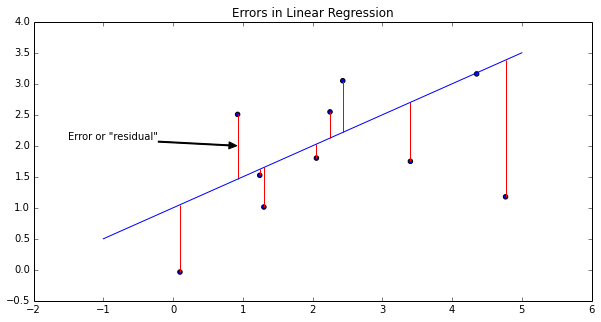

In [2]:
#############################################################
# Demonstration - What do Residuals Look Like
#############################################################

np.random.seed(33)     # Setting a seed allows reproducability of experiments

beta0 = 1              # Creating an intercept
beta1 = 0.5            # Creating a slope

# Randomly sampling data points
x_example = np.random.uniform(0,5,10)
y_example = beta0 + beta1 * x_example + np.random.normal(0,1,10)
line1 = beta0 + beta1 * np.arange(-1, 6)

f = plt.figure()
plt.scatter(x_example,y_example)   # Plotting observed data
plt.plot(np.arange(-1,6), line1)   # Plotting the true line
for i, xi in enumerate(x_example):
    plt.vlines(xi, beta0 + beta1 * xi, y_example[i], colors='red') # Plotting Residual Lines
plt.annotate('Error or "residual"', xy = (x_example[5], 2), xytext = (-1.5,2.1),
             arrowprops=dict(width=1,headwidth=7,facecolor='black', shrink=0.01))
f.set_size_inches(10,5)
plt.title('Errors in Linear Regression')
plt.show()

_Choosing a Loss Function to Optimize_

Historically Linear Regression has been solved using the method of Least Squares where we are interested in minimizing the mean squared error loss function of the form:

\begin{eqnarray*}
    Loss(\beta) = MSE &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat y_i)^2 \\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \mathbf{x_i^T}\beta)^2 \\
\end{eqnarray*}

Where $N$ is the total number of observations.  Other loss functions can be used, but using mean squared error (also referred to sum of the squared residuals in other text) has very nice properities for closed form solutions.  We will use this loss function for both gradient descent and to create a closed form matrix solution.

### Before We Present Solutions for Linear Regression: Introducing a Baseball Dataset

We'll use this dataset to investigate Linear Regression.  The dataset consists of 337 observations and 18 variables from the set of Major League Baseball players who played at least one game in both the 1991 and 1992
seasons, excluding pitchers.  The dataset contains the 1992 salaries for that population, along with performance measures for each player.  Four categorical variables indicate how free each player was to move to other teams.

** Reference **

- Pay for Play: Are Baseball Salaries Based on Performance?
    - http://www.amstat.org/publications/jse/v6n2/datasets.watnik.html

**Filename**

- 'baseball.dat.txt'.

**Variables**

- _Salary_: Thousands of dollars
- _AVG_: Batting average
- _OBP_: On-base percentage
- _Runs_: Number of runs
- _Hits_: Number of hits
- _Doubles_: Number of doubles
- _Triples_: Number of triples
- _HR_: Number of home runs
- _RBI_: Number of runs batted in
- _Walks_: Number of walks
- _SO_: Number of strike-outs
- _SB_: Number of stolen bases
- _Errs_: Number of errors
- _free agency eligibility_: Indicator of "free agency eligibility"
- _free agent in 1991/2_: Indicator of "free agent in 1991/2"
- _arbitration eligibility_: Indicator of "arbitration eligibility"
- _arbitration in 1991/2_: Indicator of "arbitration in 1991/2"
- _Name_: Player's name (in quotation marks)

** What we will try to predict **

We will attempt to predict the players salary based upon some predictor variables such as Hits, OBP, Walks, RBIs, etc. 


#### Load The Data

Loading data in python from csv files in python can be done by a few different ways.  The numpy package has a function called 'genfromtxt' that can read csv files, while the pandas library has the 'read_csv' function.  Remember that we have imported numpy and pandas as `np` and `pd` respectively at the top of this notebook.  An example using pandas is as follows:

    pd.read_csv(filename, **args)

http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html


###<span style="color:red">STUDENT ACTIVITY (2 MINS)</span> 
_**Student Action - Load the 'baseball.dat.txt' file into a variable called 'baseball'.  Then use baseball.head() to view the first few entries**_

In [3]:
#######################################################################
# Student Action - Load the file 'baseball.dat.txt' using pd.read_csv()
#######################################################################

baseball = pd.read_csv('data/baseball.dat.txt')
baseball.head()

,Salary,AVG,OBP,Runs,Hits,Doubles,Triples,HR,RBI,Walks,SO,SB,Errs,free agency eligibility,free agent in 1991/2,arbitration eligibility,arbitration in 1991/2,Name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace


_**Crash Course: Plotting with Matplotlib**_

At the top of this notebook we have imported the the package `pyplot as plt` from the `matplotlib` library.  `matplotlib` is a great package for creating simple plots in Python.  Below is a link to their tutorial for basic plotting.

_Tutorials_

- http://matplotlib.org/users/pyplot_tutorial.html
- https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html

_Simple Plotting_

- Step 0: Import the packge pyplot from matplotlib for plotting 
    - `import matplotlib.pyplot as plt`
- Step 1: Create a variable to store a new figure object
    - `fig = plt.figure()`
- Step 2: Create the plot of your choice
    - Common Plots
        - `plt.plot(x,y)` - A line plot
        - `plt.scatter(x,y)` - Scatter Plots
        - `plt.hist(x)` - Histogram of a variable
        - Example Plots: http://matplotlib.org/gallery.html
- Step 3: Create labels for your plot for better interpretability
    - X Label
        - `plt.xlabel('String')`
    - Y Label
        - `plt.ylabel('String')`
    - Title
        - `plt.title('String')`
- Step 4: Change the figure size for better viewing within the iPython Notebook
    - `fig.set_size_inches(width, height)`
- Step 5: Show the plot
    - `plt.show()`
        - The above command allows the plot to be shown below the cell that you're currently in.  This is made possible by the `magic` command `%matplotlib inline`.  
- _NOTE: This may not always be the best way to create plots, but it is a quick template to get you started._
        
_Transforming Variables_

We'll talk more about numpy later, but to perform the logarithmic transformation use the command

- `np.log(`$array$`)`

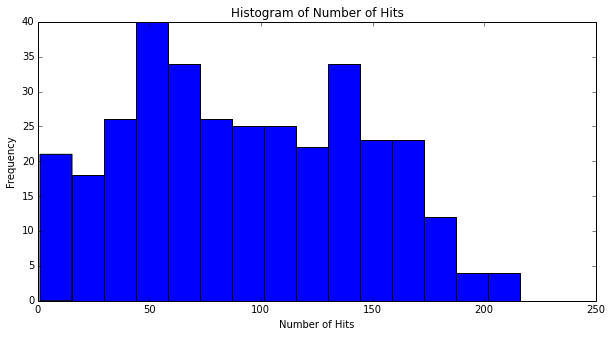

In [4]:
#############################################################
# Demonstration - Plot a Histogram of Hits 
#############################################################
f = plt.figure()
plt.hist(baseball['Hits'], bins=15)
plt.xlabel('Number of Hits')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Hits')
f.set_size_inches(10, 5)
plt.show()
del plt

##<span style="color:red">STUDENT ACTIVITY (7 MINS)</span> 

### Data Exploration - Investigating Variables

Work in pairs to import the package `matplotlib.pyplot`, create the following two plots. 

- A histogram of the $log(Salary)$
    - hint: `np.log()`
- a scatterplot of $log(Salary)$ vs $Hits$.

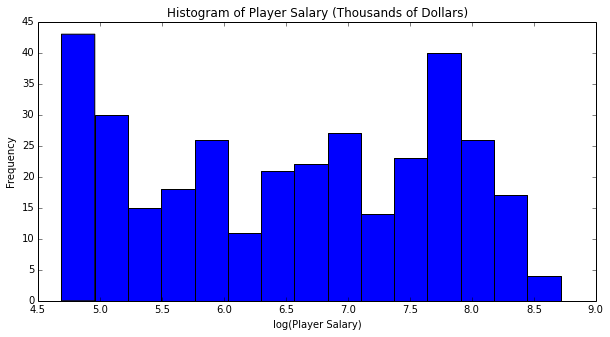

In [5]:
#############################################################
# Student Action - Plot a Histogram of log(Salaries)
#############################################################

import matplotlib.pyplot as plt
f = plt.figure()
plt.hist(np.log(baseball['Salary']), bins=15)
plt.xlabel('log(Player Salary)')
plt.ylabel('Frequency')
plt.title('Histogram of Player Salary (Thousands of Dollars)')
f.set_size_inches(10, 5)
plt.show()

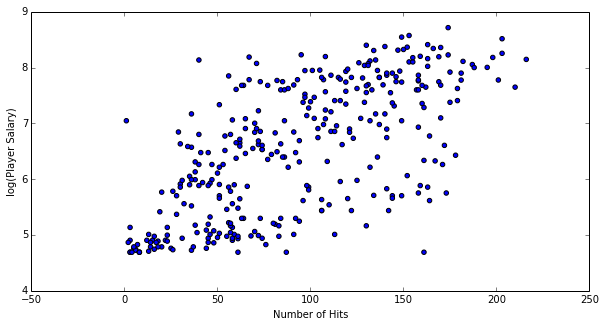

In [6]:
#############################################################
# Studdent Action - Plot a Scatter Plot of Salarie vs. Hitting
#############################################################

f = plt.figure()
plt.scatter(baseball['Hits'], np.log(baseball['Salary']))
plt.xlabel('Number of Hits')
plt.ylabel('log(Player Salary)')
f.set_size_inches(10, 5)
plt.show()

## Gradient Descent for Linear Regression

In Linear Regression we are interested in optimizing our loss function $Loss(\beta)$ to find the optimatal $\beta$ such that 

\begin{eqnarray*}
\hat \beta &=& \arg \min_{\beta} \frac{1}{N} \sum_{i=1}^{N} (y_i - \mathbf{x_i^T}\beta)^2 \\
&=& \arg \min_{\beta} \frac{1}{N} \mathbf{(Y - X\beta)^T (Y - X\beta)} \\
\end{eqnarray*}

One optimization technique called 'Gradient Descent' is useful for finding an optimal solution to this problem.  Gradient descent is a first order optimization technique that attempts to find a local minimum of a function by updating its position by taking steps proportional to the negative gradient of the function at its current point.  The gradient at the point indicates the direction of steepest ascent and is the best guess for which direction the algorithm should go.  

If we consider $\theta$ to be some parameters we are interested in optimizing, $L(\theta)$ to be our loss function, and $\alpha$ to be our step size proportionality, then we have the following algorithm:

_________

_**Algorithm - Gradient Descent**_

- Initialize $\theta$
- Until $\alpha || \nabla L(\theta) || < tol $:
    - $\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla_{\theta} L(\theta^{(t)})$
__________

For our problem at hand, we therefore need to find $\nabla L(\beta)$. The deriviative of $L(\beta)$ due to the $j^{th}$ feature is:

\begin{eqnarray*}
    \frac{\partial L(\beta)}{\partial \beta_j} = -\frac{2}{N}\sum_{i=1}^{N} (y_i - \mathbf{x_i^T}\beta)\cdot{x_{i,j}}
\end{eqnarray*}

In matrix notation this can be written:

\begin{eqnarray*}
Loss(\beta) &=& \frac{1}{N}\mathbf{(Y - X\beta)^T (Y - X\beta)} \\
&=& \frac{1}{N}\mathbf{(Y^TY} - 2 \mathbf{\beta^T X^T Y + \beta^T X^T X\beta)} \\
\nabla_{\beta} L(\beta) &=& \frac{1}{N} (-2 \mathbf{X^T Y} + 2 \mathbf{X^T X \beta)} \\
&=& -\frac{2}{N} \mathbf{X^T (Y - X \beta)} \\
\end{eqnarray*}

###<span style="color:red">STUDENT ACTIVITY (7 MINS)</span> 
### Create a function that returns the gradient of $L(\beta)$

In [7]:
###################################################################
# Student Action - Programming the Gradient
###################################################################

def gradient(X, y, betas):
    #****************************
    # Your code here!
    err = y - np.dot(X, betas)
    return -2*np.dot(X.transpose(),err)/len(y)
    #****************************
    

#########################################################
# Testing your gradient function
#########################################################
np.random.seed(33)
X = pd.DataFrame({'ones':1, 
                  'X1':np.random.uniform(0,1,50)})
y = np.random.normal(0,1,50)
betas = np.array([-1,4])
grad_expected = np.array([ 2.98018138,  7.09758971])
grad = gradient(X,y,betas)
try:
    np.testing.assert_almost_equal(grad, grad_expected)
    print "Test Passed!"
except AssertionError:
    print "*******************************************"
    print "ERROR: Something isn't right... Try Again!"
    print "*******************************************"


Test Passed!


###<span style="color:red">STUDENT ACTIVITY (15 MINS)</span> 

_** Student Action - Use your Gradient Function to complete the Gradient Descent for the Baseball Dataset**_

#### Code Gradient Descent Here

We have set-up the all necessary matrices and starting values.  In the designated section below code the algorithm from the previous section above. 

In [8]:
# Setting up our matrices 
Y = np.log(baseball['Salary'])
N = len(Y)
X = pd.DataFrame({'ones' : np.ones(N), 
                  'Hits' : baseball['Hits']})
p = len(X.columns)

# Initializing the beta vector 
betas = np.array([0.015,5.13])

# Initializing Alpha
alph = 0.00001

# Setting a tolerance 
tol = 1e-8

###################################################################
# Student Action - Programming the Gradient Descent Algorithm Below
###################################################################

err = Y - np.dot(X, betas)
grad = gradient(X,Y,betas)
niter = 1.
while (alph*np.linalg.norm(gradient(X,Y,betas)) > tol) and (niter < 20000):
    #****************************
    # Your code here!
    betas = betas - alph*gradient(X,Y,betas)
    niter += 1
    #****************************

print niter, betas

try:
    beta_expected = np.array([ 0.01513772, 5.13000121])
    np.testing.assert_almost_equal(betas, beta_expected)
    print "Test Passed!"
except AssertionError:
    print "*******************************************"
    print "ERROR: Something isn't right... Try Again!"
    print "*******************************************"

33.0 [ 0.01513772  5.13000121]
Test Passed!


** Comments on Gradient Descent**

- Advantage: Very General Algorithm $\rightarrow$ Gradient Descent and its variants are used throughout Machine Learning and Statistics
- Disadvantage: Highly Sensitive to Initial Starting Conditions
    - Not gauranteed to find the global optima
- Disadvantage: How do you choose step size $\alpha$?
    - Too small $\rightarrow$ May never find the minima
    - Too large $\rightarrow$ May step past the minima
    - Can we fix it?
        - Adaptive step sizes
        - Newton's Method for Optimization
            - http://en.wikipedia.org/wiki/Newton%27s_method_in_optimization
        - Each correction obviously comes with it's own computational considerations.

See the Supplementary Material for any help necessary with scripting this in Python.

## Linear Regression Matrix Solution

From the last section, you may have recognized that we could actually solve for $\beta$ directly.  

\begin{eqnarray*}
Loss(\beta) &=& \frac{1}{N}\mathbf{(Y - X\beta)^T (Y - X\beta)} \\
\nabla_{\beta} L(\beta) &=& \frac{1}{N} (-2 \mathbf{X^T Y} + 2 \mathbf{X^T X \beta}) \\
\end{eqnarray*}

Setting to zero

\begin{eqnarray*}
-2 \mathbf{X^T Y} + 2 \mathbf{X^T X} \beta &=& 0 \\
\mathbf{X^T X \beta}  &=& \mathbf{X^T Y} \\
\end{eqnarray*}

If we assume that the columns $X$ are linearly independent then

\begin{eqnarray*}
 \hat \beta  &=& \mathbf{(X^T X)^{-1}X^T Y} \\
\end{eqnarray*}

This is called the _Ordinary Least Squares_ (OLS) Estimator 

###<span style="color:red">STUDENT ACTIVITY (10 MINS)</span> 

_** Student Action - Solve for $\hat \beta$ directly using OLS on the Baseball Dataset - 10 mins** _
    
- Review the Supplementary Materials for help with Linear Algebra

In [9]:
# Setting up our matrices 
y = np.log(baseball['Salary'])
N = len(Y)
X = pd.DataFrame({'ones' : np.ones(N), 
                  'Hits' : baseball['Hits']})

#############################################################
# Student Action - Program a closed form solution for 
#                  Linear Regression. Compare with Gradient
#                  Descent.
#############################################################

def solve_linear_regression(X, y):
    #****************************
    # Your code here!
    XtX = np.dot(X.transpose(), X)
    invXtX = np.linalg.inv(XtX)
    XtY = np.dot(X.transpose(), y)
    return np.dot(invXtX, XtY)
    #****************************

betas = solve_linear_regression(X,y)

try:
    beta_expected = np.array([ 0.01513353, 5.13051682])
    np.testing.assert_almost_equal(betas, beta_expected)
    print "Betas: ", betas
    print "Test Passed!"
except AssertionError:
    print "*******************************************"
    print "ERROR: Something isn't right... Try Again!"
    print "*******************************************"

Betas:  [ 0.01513353  5.13051682]
Test Passed!



** Comments on solving the loss function directly **

- Advantage: Simple solution to code 
- Disadvantage: The Design Matrix must be Full Rank to invert
    - Can be corrected with a Generalized Inverse Solution
- Disadvantage: Inverting a Matrix can be a computational expensive operation
    - If we have a design matrix that has $N$ observations and $D$ predictors, then X is $(N\times D)$ it follows then that
    
    \begin{eqnarray*}
        \mathbf{X^TX} \mbox{ is of size } (D \times N) \times (N \times D) = (D \times D) \\
    \end{eqnarray*}
    
    - If a matrix is of size $(D\times D)$, the computational cost of inverting it is $O(D^3)$.  
    - Thus inverting a matrix is directly related to the number of predictors that are included in the analysis.  


## Sci-Kit Learn Linear Regression

As we've shown in the previous two exercises, when coding these algorithms ourselves, we must consider many things such as selecting step sizes, considering the computational cost of inverting matrices.  For many applications though, packages have been created that have taken into consideration many of these parameter selections.  We now turn our attention to the Python package for Machine Learning called 'scikit-learn'.  

- http://scikit-learn.org/stable/

Included is the documentation for the scikit-learn implementation of Ordinary Least Squares from their linear models package

- _Generalized Linear Models Documentation:_ 
    - http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

- _LinearRegression Class Documentation:_  
    - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

From this we that we'll need to import the module `linear_model` using the following:

    from sklearn import linear_model
    
Let's examine an example using the `LinearRegression` class from scikit-learn.  We'll continue with the simulated data from the beginning of the exercise.

### _Example using the variables from the Residual Example_

** Notes ** 

- Calling `linear_model.LinearRegression()` creates an object of class  `sklearn.linear_model.base.LinearRegression`
    - Defaults 
        - `fit_intercept = True`: automatically adds a column vector of ones for an intercept
        - `normalize = False`: defaults to not normalizing the input predictors
        - `copy_X = False`: defaults to not copying X
        - `n_jobs = 1`: The number of jobs to use for the computation. If -1 all CPUs are used. This will only provide speedup for n_targets > 1 and sufficient large problems.
    - Example
        - `lmr = linear_model.LinearRegression()
- To fit a model, the method `.fit(X,y)` can be used
    - X must be a column vector for scikit-learn
        - This can be accomplished by creating a DataFrame using `pd.DataFrame()`
    - Example
        - lmr.fit(X,y)
- To predict out of sample values, the method `.predict(X)` can be used
- To see the $\beta$ estimates use `.coef_` for the coefficients for the predictors and `.intercept` for $\beta_0$

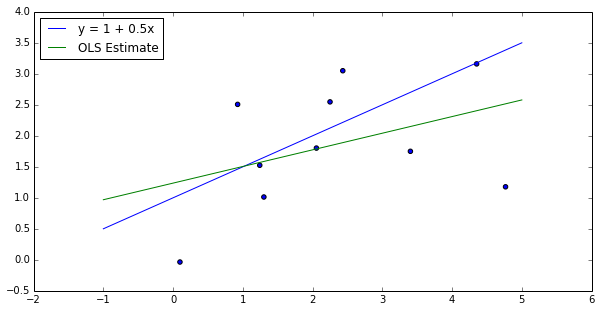

[[ 0.26827489]] [ 1.23701501]


In [10]:
#############################################################
# Demonstration - scikit-learn with Regression Example
#############################################################

from sklearn import linear_model

lmr = linear_model.LinearRegression()
lmr.fit(pd.DataFrame(x_example), pd.DataFrame(y_example))

xTest = pd.DataFrame(np.arange(-1,6))
yHat = lmr.predict(xTest)

f = plt.figure()
plt.scatter(x_example, y_example)
p1, = plt.plot(np.arange(-1,6), line1)
p2, = plt.plot(xTest, yHat)
plt.legend([p1, p2], ['y = 1 + 0.5x', 'OLS Estimate'], loc=2)
f.set_size_inches(10,5)
plt.show()

print lmr.coef_, lmr.intercept_

###<span style="color:red">STUDENT ACTIVITY (15 MINS)</span> 

### _**Final Student Task**_

Programming Linear Regression using the scikit-learn method.  For the ambitious students, plot all results on one plot.  

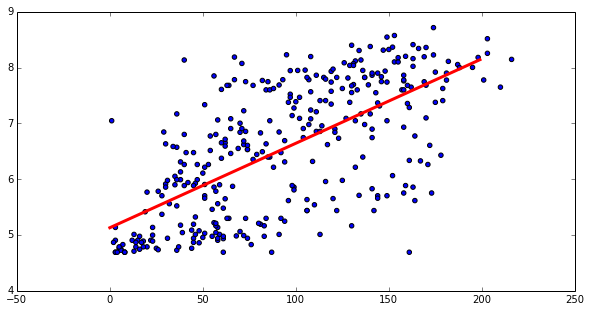

[ 0.01513353] 5.13051681568


In [11]:
#######################################################################
# Student Action - Use scikit-learn to calculate the beta coefficients
#
# Note: You no longer need the intercept column in your X matrix for 
#       sci-kit Learn.  It will add that column automatically.
#######################################################################

lmr2 = linear_model.LinearRegression(fit_intercept=True)
lmr2.fit(pd.DataFrame(baseball['Hits']),Y)
xtest = np.arange(0,200)
ytest = lmr2.intercept_ + lmr2.coef_*xtest

f = plt.figure()
plt.scatter(baseball['Hits'], np.log(baseball['Salary']))
plt.plot(xtest, ytest, color='r', linewidth=3)
f.set_size_inches(10,5)
plt.show()
print lmr2.coef_, lmr2.intercept_

## Linear Regression in the Real World

In the real world, Linear Regression for predictive modeling doesn't end once you've fit the model. Models are often fit and used to predict user behavior, used to quantify business metrics, or sometimes used to identify cats faces for internet points.  In that pursuit, it isn't really interesting to fit a model and assess its performance on data that has already been observed.  The real interest lies in _**how it predicts future observations!**_

Often times then, we may be susceptible to creating a model that is perfected for our observed data, but that does not generalize well to new data.  In order to assess how we perform to new data, we can _score_ the model on both the old and new data, and compare the models performance with the hope that the it generalizes well to the new data. After lunch we'll introduce some techniques and other methods to better our chances of performing well on new data. 

Before we break for lunch though, let's take a look at a simulated dataset to see what we mean...

_Situation_

Imagine that last year a talent management company managed 400 celebrities and tracked how popular they were within the public eye, as well various predictors for that metric.  The company is now interested in managing a few new celebrities, but wants to sign those stars that are above a certain 'popularity' threshold to maintain their image.

Our job is to predict how popular each new celebrity will be over the course of the coming year so that we make that best decision about who to manage. For this analysis we'll use a function `l2_error` to compare our errors on a training set, and on a test set of celebrity data.

The variable `celeb_data_old` represents things we know about the previous batch of celebrities.  Each row represents one celeb.  Each column represents some tangible measure about them -- their age at the time, number of Twitter followers, voice squeakiness, etc.  The specifics of what each column represents aren't important.

Similarly, `popularity_score_old` is a previous measure of the celebrities popularity.

Finally, `celeb_data_new` represents the same information that we had from `celeb_data_old` but for the new batch of internet wonders that we're considering.

How can we predict how popular the NEW batch of celebrities will be ahead of time so that we can decide who to sign? And are these estimates stable from year to year?

In [12]:
with np.load('data/mystery_data_old.npz') as data:
    celeb_data_old = data['celeb_data_old']
    popularity_old = data['popularity_old']
    celeb_data_new = data['celeb_data_new']

lmr3 = linear_model.LinearRegression()
lmr3.fit(celeb_data_old, popularity_old)
predicted_popularity_old = lmr3.predict(celeb_data_old)
predicted_popularity_new = lmr3.predict(celeb_data_new)

def l2_error(y_true, y_pred):
    """
    calculate the sum of squared errors (i.e. "L2 error") 
    given a vector of true ys and a vector of predicted ys
    """
    diff = (y_true-y_pred)
    return np.sqrt(np.dot(diff, diff))

print "Predicted L2 Error:", l2_error(popularity_old, predicted_popularity_old)

# print "Popularity prediction for the first 10 new cat wranglers:"
# print predicted_profits[:10, np.newaxis]

Predicted L2 Error: 18.1262825607


### Checking How We Did
At the end of the year, we tally up the popularity numbers for each celeb and check how well we did on our predictions.

In [13]:
with np.load('data/mystery_data_new.npz') as data:
    popularity_new = data['popularity_new']

print "Predicted L2 Error:", l2_error(popularity_new, predicted_popularity_new)

Predicted L2 Error: 24.173135433


Something's not right... our model seems to be performing worse on this data!  Our model performed so well on last year's data, why didn't it work on the data from this year?